In [1]:
#importing pandas to perform descriptive analysis on the sales data with discounts date set
import pandas as pd

In [3]:
#loading data_set into programing environment
df= pd.read_csv("sales_data_with_discounts.csv")

In [5]:
#identifying numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [7]:
#identifying the numerical 
numerical_cols= df.select_dtypes(include=['float64','int64']).columns
print("Numerical columns:",numerical_cols)

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [9]:
#calculating basic statistics 
#calculating mean,median,mode and standard deviation
mean=df[numerical_cols].mean()
median=df[numerical_cols].median()
mode=df[numerical_cols].mode().iloc[0]
std_dev=df[numerical_cols].std()

#creating statistical summary data frame
statistical_summary=print({
    'mean':mean,
    'median':median,
    'mode':mode,
    'standard deviation':std_dev
})

{'mean': Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64, 'median': Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64, 'mode': Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64, 'standard deviation': Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64}


In [11]:
#or
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## **Key Findings From Statistical Analysis**
 1. From mean and median we can see that except discount rate variables like average price,total sales value,discount amount and net sales       value shows right-skewed distributions.
  and volume and discount rates have slightly balanced disributions.
  
 2. The mean values are consistently higher than the median values indicating the presence of outliers.

 3. The mode values are frequently low like discount rate ,dis amount,volume suggesting a certain type of patterns.

 4. Monetory variables like average price,discount price,total sales value and net sales value have high standard deviation which means the customer        spending behavior has a wide range.

## **Data Visualization**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

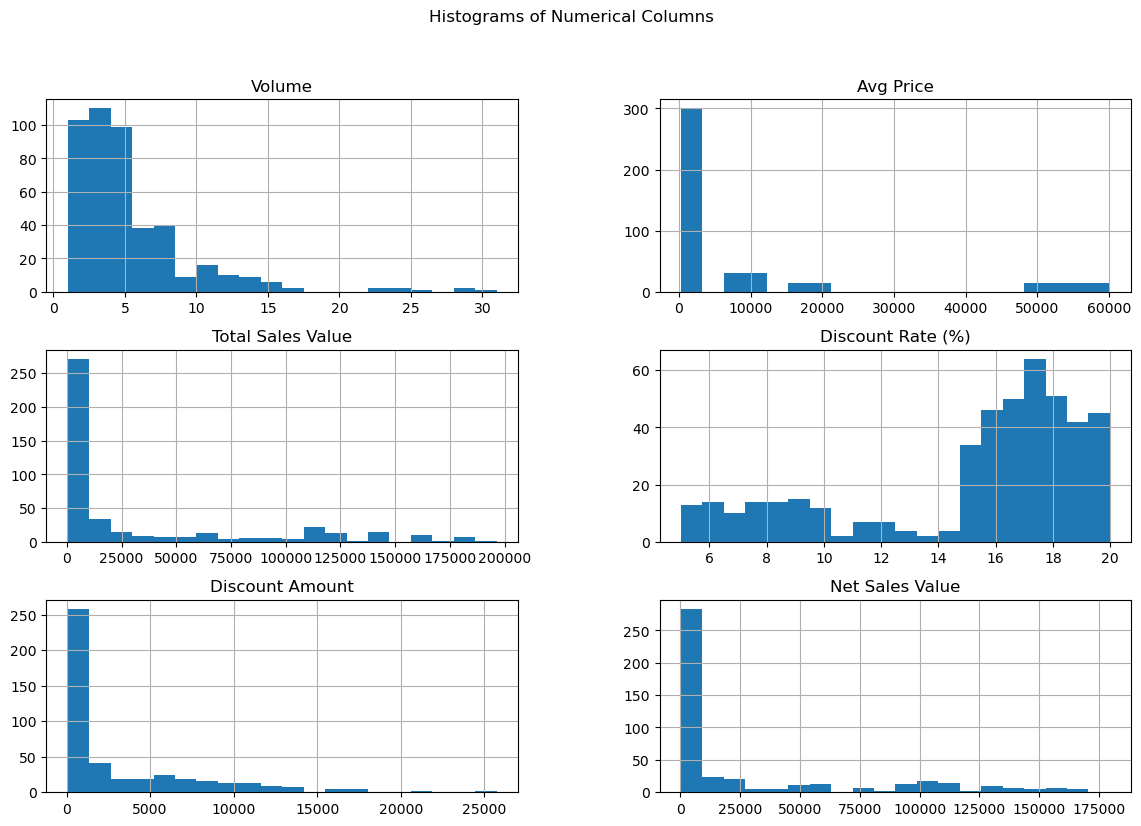

In [18]:
# Plotting histograms for each numerical column
df[numerical_cols].hist(bins=20, figsize=(14,9))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [20]:
df.skew(numeric_only=True)

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

In [22]:
#or
skewness=df[numerical_cols].skew()
print('skewness of numerical columns:')
print(skewness)

skewness of numerical columns:
Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


## **Ananlysis**
1. Volume:distrubution is Right-skewed, with most data points concentrated between 0 and 1

2. Average Price: Highly right-skewed, with most values clustered below 10,000.
 
3. Total Sales Value:Extremely right-skewed, with most values below 25,000.
 
4. Discount Rate (%): More uniformly distributed between 5% and 20%, with a slight peak near 18%.

5. Discount Amount: Right-skewed, with most values below 5,000.

6. Net Sales Value: Strongly right-skewed, with most values under 25,000.
## **Inference**
1. Volume: Majority of transactions have low volumes, while a few have significantly higher values.

2. Averange price: Most products have low average prices, but there are some expensive products, as indicated by the outliers.

3. Total sales value: Most sales transactions are of low total value, but a few high-value transactions significantly extend the range

4. discount rate(%): Discounts are fairly consistent, with a tendency for higher discount rates (for instance: 15%-20%)

5. Discount amount: Discounts are generally low for most transactions, but a few high-discount amounts are present.

6. Net sales value: Similar to Total Sales Value, net sales values are mostly small, with a few high-value transactions contributing to the tail.
### **General Observations**
-Most numerical variables are right-skewed, indicating the presence of a few high-value transactions or extreme values.

-There is a concentration of low values in variables like Total Sales Value, Net Sales Value, and Discount Amount.

-Discount Rate (%) shows a relatively uniform distribution compared to the other variables, indicating a consistent discounting strategy.

-Outliers are evident in almost all variables, which may need further investigation or handling .

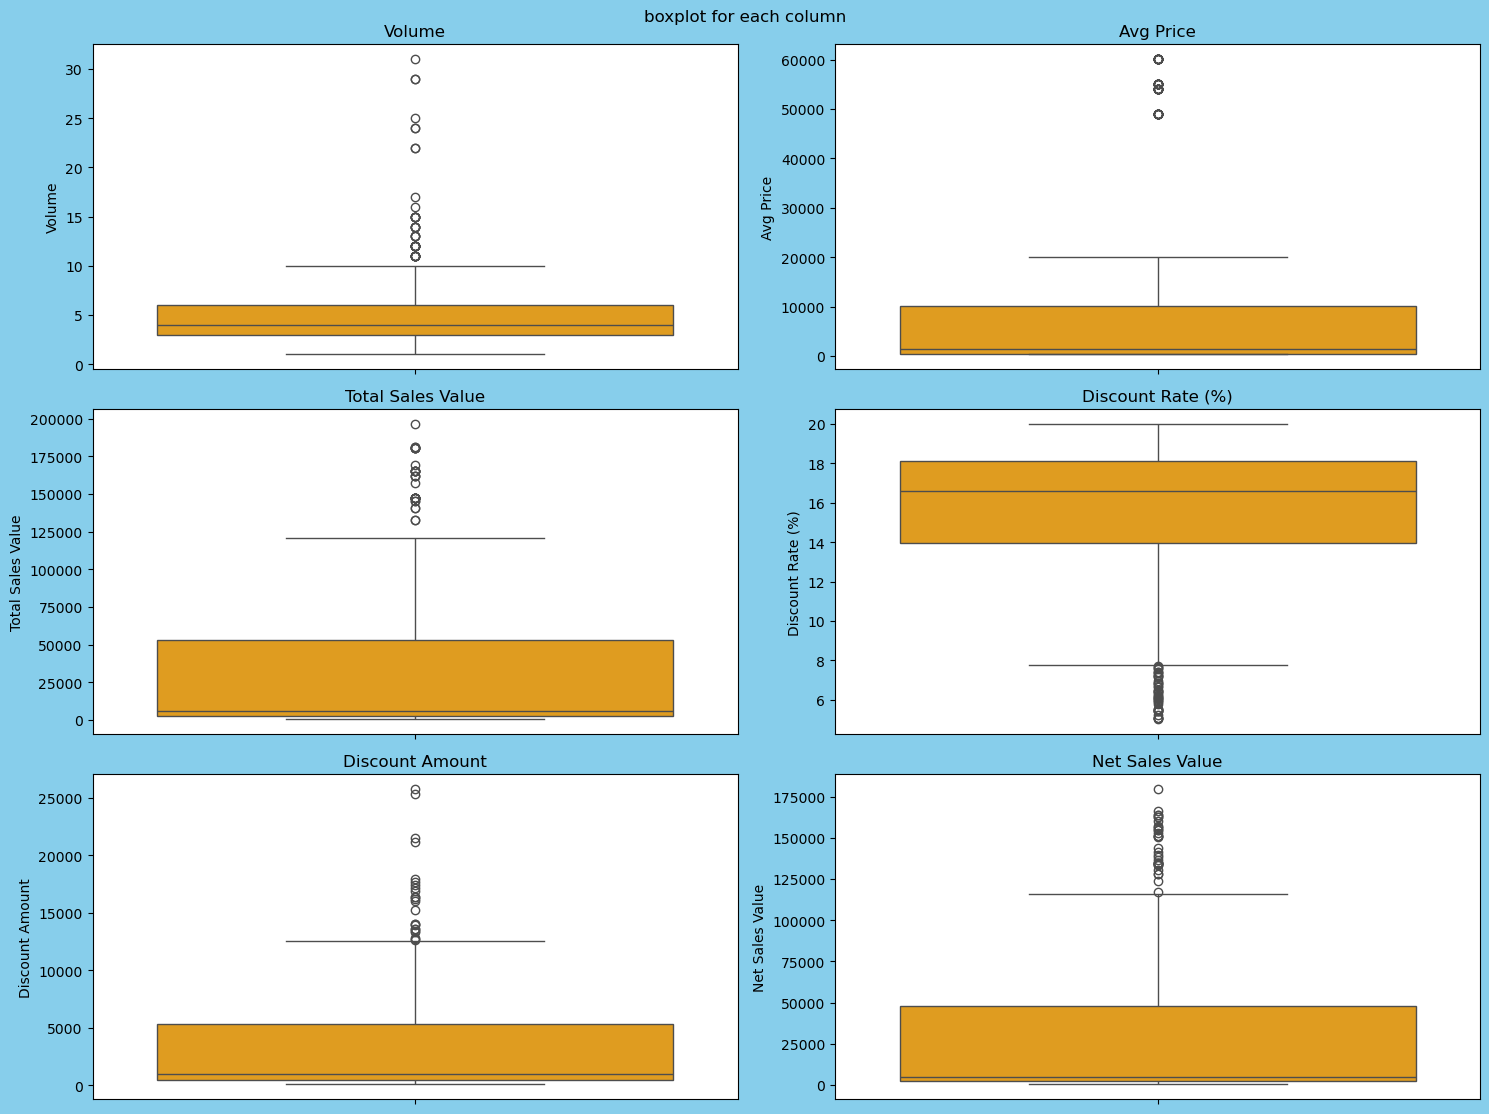

In [25]:
#Now Creating boxplots for numerical variables
plt.figure(figsize=(15, 15),facecolor='skyblue')
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i + 1)  # Adjust the number of rows/columns as needed
    sns.boxplot(y=df[col],color= 'orange')
    plt.suptitle('boxplot for each column')
    plt.title(col)
plt.tight_layout()
plt.show()

### **Outliers**
-Outliers are present in all variables, which shows a consistent range.

-These outliers could significantly impact the mean and other summary statistics.

### **Distributions**
-The presence of extreme values in most variables indicates right-skewed distributions

### **Potential Actions To Be Taken**
-study the outliers to determine if they are valid data points (e.g:high-value transactions) or errors.

-Consider transforming skewed variables or handling outliers in further analyses.

In [28]:
#indentifying the categorical columns
categorical_cols =df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_cols)

categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


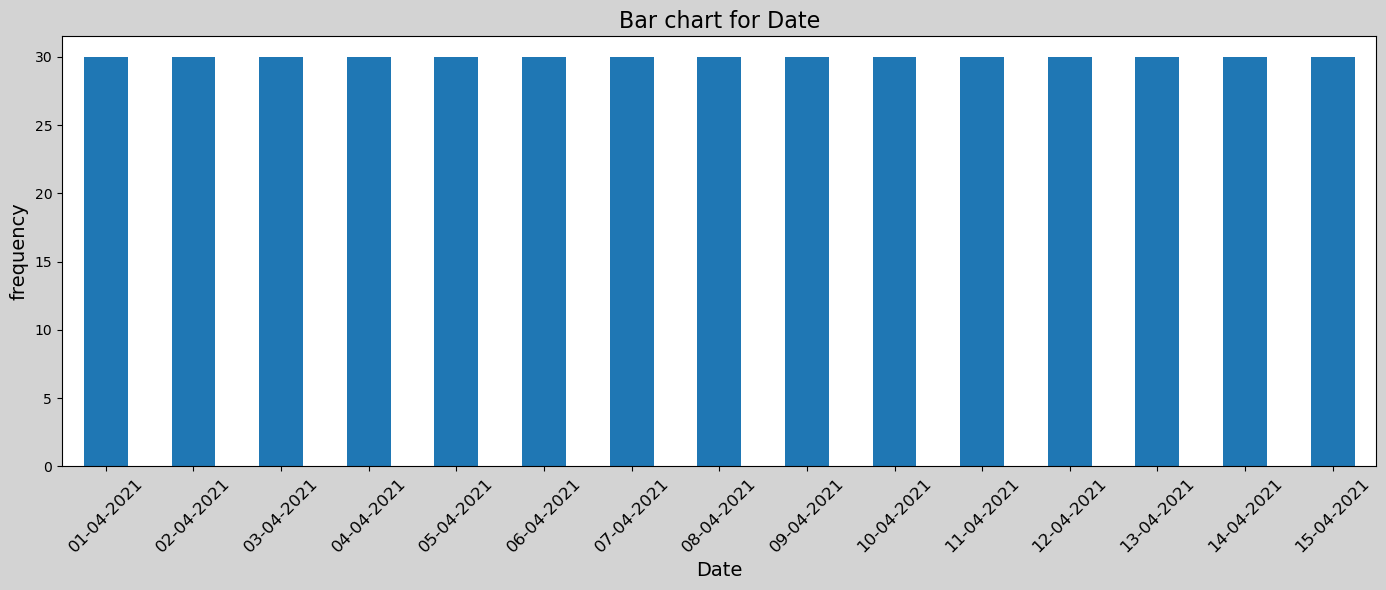

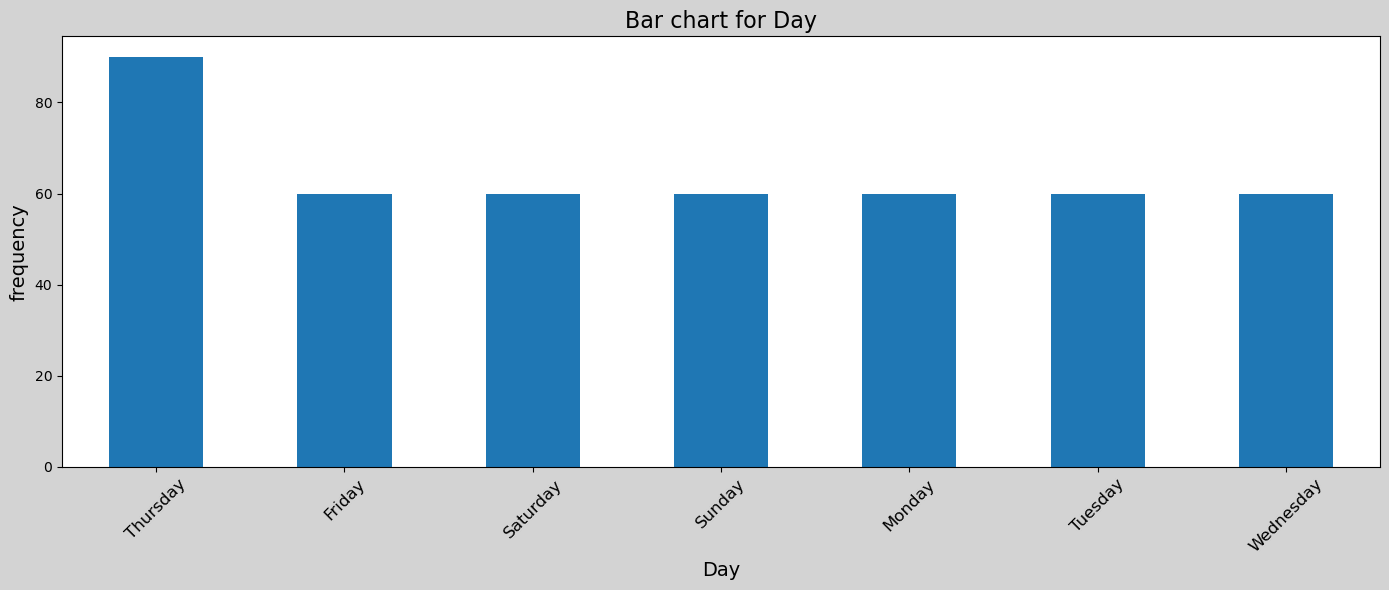

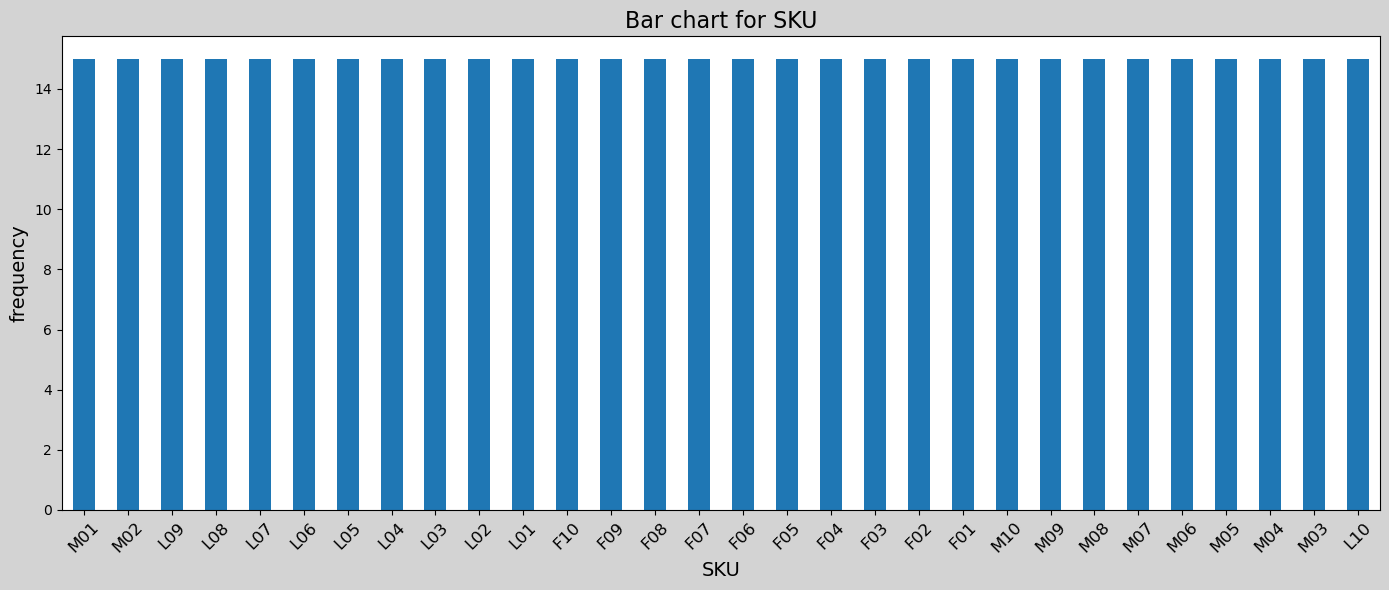

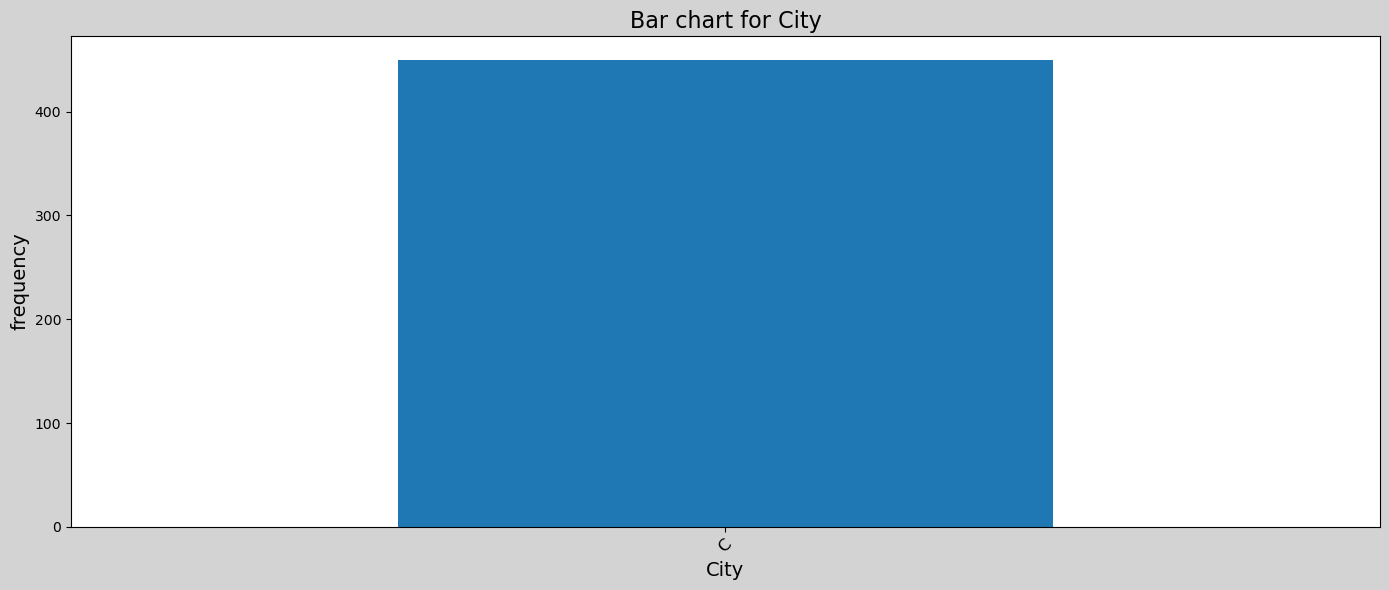

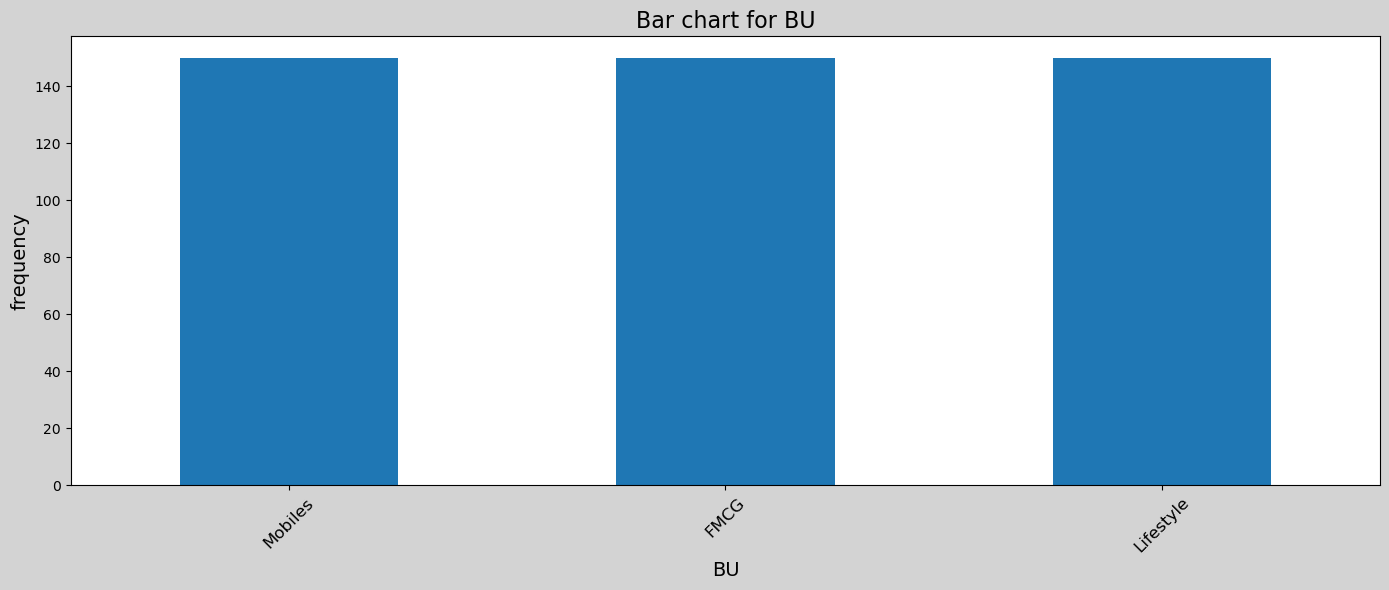

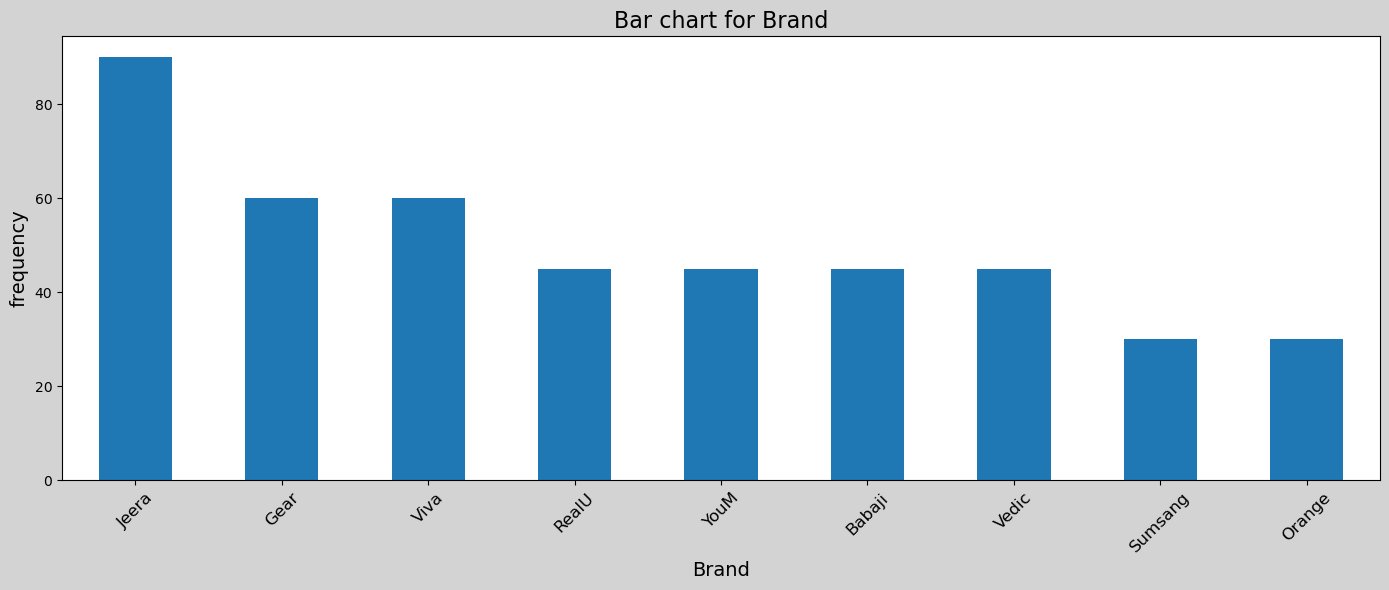

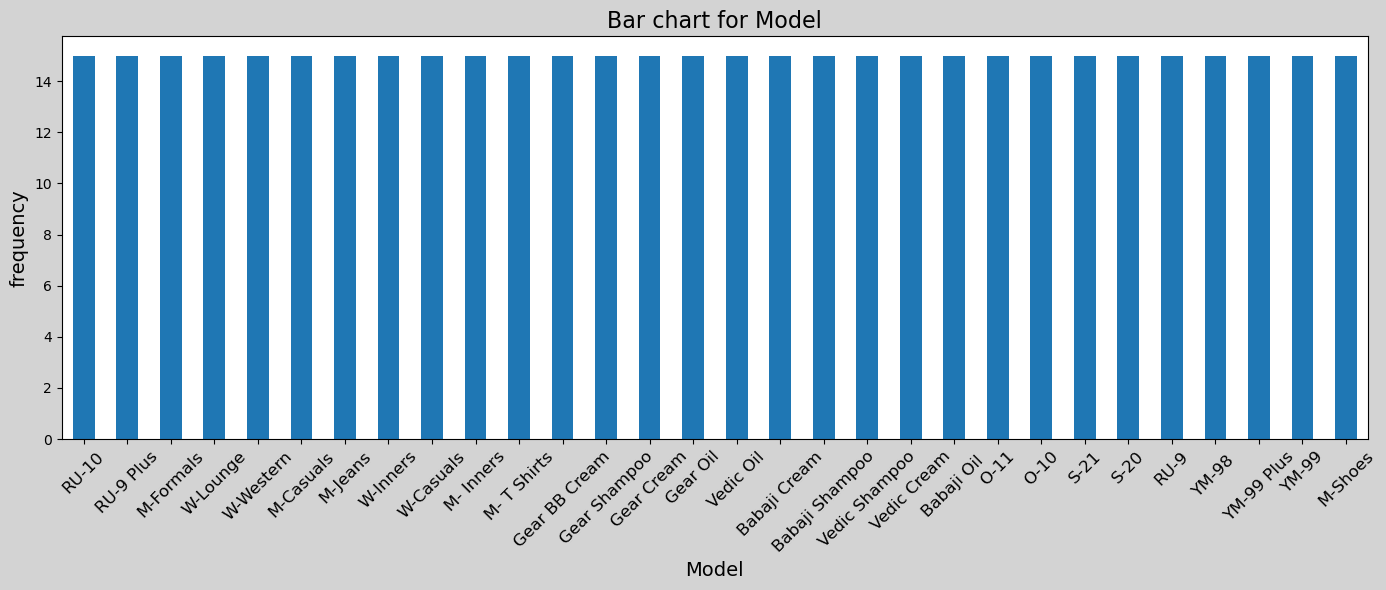

In [32]:
#creating bar chart for each categorical columns 
for col in categorical_cols:
    fig,ax =plt.subplots(figsize=(14,6),facecolor='lightgrey')
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart for {col}',fontsize=16)
    plt.xlabel(col,fontsize=14)
    plt.ylabel('frequency',fontsize=14)
    plt.xticks(rotation=45,fontsize=12)
    plt.tight_layout()
    plt.show()

## **Analysis of the Distribution**
### **Uniform Distribution**
The bar chart shows that all categories (example:models) have approximately equal frequency. Each category has the same height,shows equal representation.
### **Categories**
The categories span a wide range of models, from "RU-10 Plus" to "M-Shoes," with no single model dominating or lagging in terms of frequency.
## **Insights**
-All categories have equal frequency, the data suggests balanced representation across all product models.

-There are no standout categories in terms of frequency. This implies no single product that dominates the dataset.
### **To gain deeper insights**
we need to look into sales, revenue, or other metrics for these models to identify trends.

## **Standardizatiom**

### **Standardization(Z-score Normalization)**
    Standardization or Z-score normalization is a preprocessing technique used to transform the date to new where the dataset mean is 0 and standard        deviation is 1. to ensure that all features contribute equally to learning models like logistic regression,SVM and PCA 
    The standardized date ensures fair comparison between large and small scale features,helps to improve model performance like gradiant descent.
    standardized data is easier to visualize especially when comparing features with different units

In [37]:
# Standardize numerical columns
standardized_df = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()
#Before and after comparisons
comparison_df = pd.concat([df[numerical_cols].head(), standardized_df.head()], axis=1)

# Create new column names for the comparison DataFrame
original_columns = [f'Original - {col}' for col in numerical_cols]
standardized_columns = [f'Standardized - {col}' for col in numerical_cols]

# Update the columns of the comparison DataFrame
comparison_df.columns = original_columns + standardized_columns

# Print the comparison DataFrame
print(comparison_df)

   Original - Volume  Original - Avg Price  Original - Total Sales Value  \
0                 15                 12100                        181500   
1                 10                 10100                        101000   
2                  7                 16100                        112700   
3                  6                 20100                        120600   
4                  3                  8100                         24300   

   Original - Discount Rate (%)  Original - Discount Amount  \
0                     11.654820                21153.498820   
1                     11.560498                11676.102961   
2                      9.456886                10657.910157   
3                      6.935385                 8364.074702   
4                     17.995663                 4372.946230   

   Original - Net Sales Value  Standardized - Volume  \
0               160346.501180               2.347417   
1                89323.897039               1.165831

## **Convesion Of Categorical Data Into Dummy Variables**

### **To transform categorical variables into a format that can be provided to ML algorithms**
-We need to apply one hot encoding to categorical columns which creates a binary system to categorical variales.
machine learning algorithms like regression,decision tree and neural networks requires numerical data input to process .

-Numbering the categories like 1,2,3..can mislead the machine learning algorithms to thinks as them as rankings .one hot encoding ensure the date to avoid ordinal assumption

-By creating binary system for categorical data we can avoid the risk of losing the data

-Improves model performance by ditecting patterns accurately

-One hot encoding is the best preprocessing technique before giving the data to ML algorithms

### **Applying one-hot encoding**

In [44]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# reviewing data after one hot encoding
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

# **summary**

## **Key Findings from Statistical Analysis**

Distribution Characteristics: The analysis reveals that key monetary variables (average price, total sales value, discount amount, and net sales value) exhibit significant right-skewed distributions, indicating a predominance of lower values in the dataset

Presence of Outliers: The mean values are consistently higher than the median values, indicating the presence of outliers in the dataset.

Low Mode Values: Mode values for variables like discount rate, discount amount, and volume are frequently low, suggesting specific patterns in customer behavior.

High Variability in Monetary Variables: Variables such as average price, discount price, total sales value, and net sales value exhibit high standard deviations, indicating a wide range of customer spending behavior.

## **Data Visualization**

Volume Distribution: Right-skewed, with most data points concentrated between 0 and 1.

Average Price: Highly right-skewed, with most values clustered below 10,000.

Total Sales Value: Extremely right-skewed, with most values below 25,000.

Discount Rate (%): More uniformly distributed between 5% and 20%, with a slight peak near 18%.

Discount Amount: Right-skewed, with most values below 5,000.

Net Sales Value: Strongly right-skewed, with most values under 25,000.

## **Conclusion**
Most numerical variables are right-skewed, indicating a concentration of low values and the presence of outliers, particularly in monetary variables.

## **The Importance Of Data Preprocessing steps**

### **Standardization**

Standardization helps Improve Model Performance in many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines), perform better when features are on a similar scale.
- In gradient descent optimization, standardizing features can lead to faster convergence, as it helps avoid issues related to varying scales of features.
- While standardization does not eliminate outliers, it can reduce their impact on the model by centering the data around the mean.
- Standardized features can make it easier to interpret the coefficients in linear models, as they reflect the number of standard deviations a feature is from the mean.
### **One-Hot Encoding**

Many machine learning algorithms require numerical input. One-hot encoding allows categorical variables to be included in the model.
- By converting categories into binary columns, one-hot encoding avoids introducing unintended ordinal relationships that could mislead the model (e.g., treating "red," "blue," and "green" as having a numerical order).
- One-hot encoding allows for clearer interpretation of the impact of each category on the target variable, as each category is treated independently.
- Models can learn from the presence or absence of categories, allowing for more nuanced predictions based on categorical features.
### **Conclusion**

Data preprocessing steps like standardization and one-hot encoding are essential for preparing data for analysis and machine learning. They enhance model performance, improve interpretability, and ensure that the data is in a suitable format for algorithms to learn effectively. Neglecting these steps can lead to suboptimal model performance and inaccurate predictions. Therefore, investing time in proper data preprocessing is critical for successful data analysis and for applying machine learning algorithms .